In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading Dataset
data = pd.read_excel('Airlines+Data.xlsx')

In [3]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
#Visualization and Data Preprocessing

In [5]:
data.shape

(96, 2)

In [6]:
data.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [7]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [8]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
data.set_index('Month', inplace=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


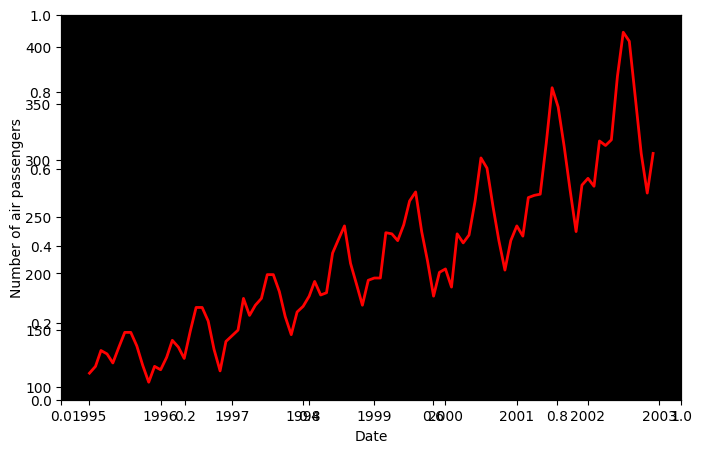

In [10]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(data['Passengers'], color = 'red', linewidth=2)

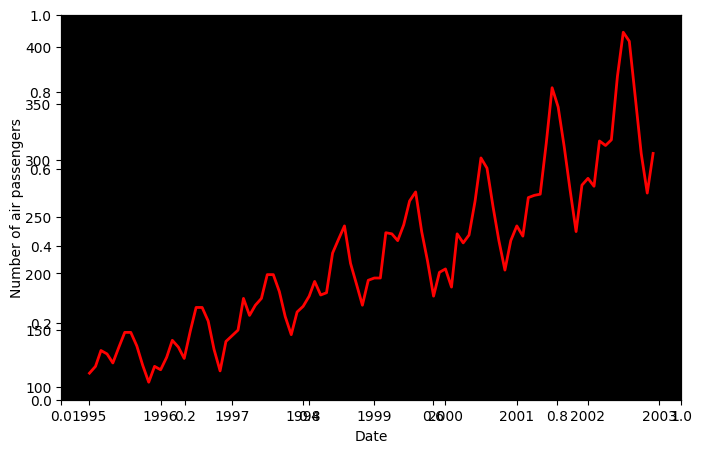

In [11]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(data['Passengers'], color = 'red', linewidth=2)


<Axes: ylabel='Density'>

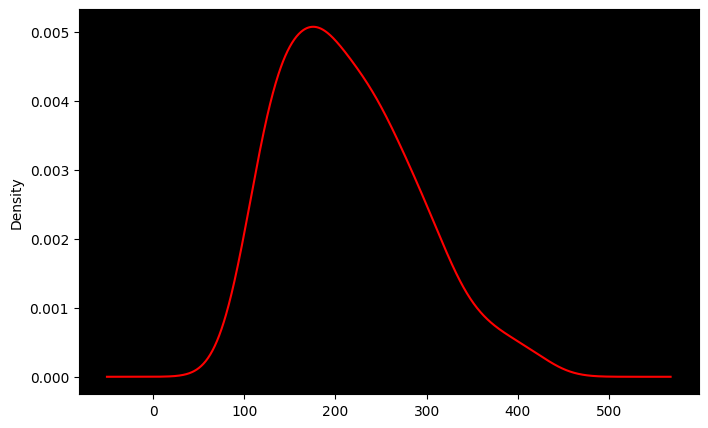

In [12]:
# Density Plot
ax = plt.axes()
ax.set_facecolor("black")
data['Passengers'].plot(kind = 'kde', figsize=(8,5), color = 'red')

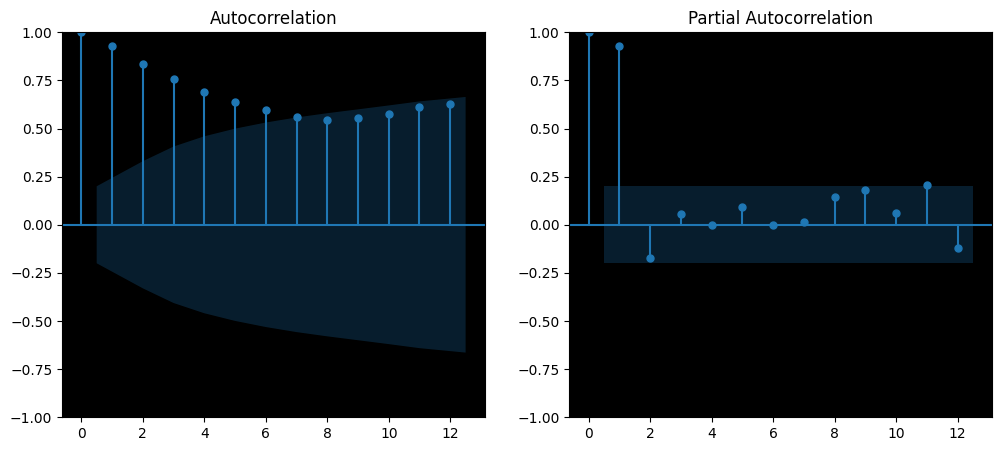

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots
import matplotlib.pyplot as plt

# Correcting the order of creating axes before plotting ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_facecolor("black")
ax2.set_facecolor("black")

tsa_plots.plot_acf(data.Passengers, lags=12, ax=ax1)
tsa_plots.plot_pacf(data.Passengers, lags=12, ax=ax2)

plt.show()

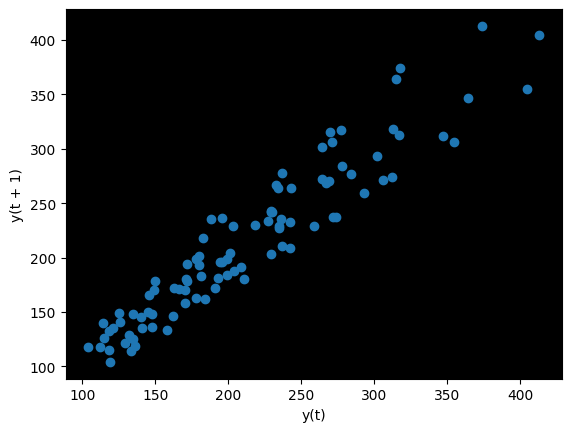

In [14]:
# Lagplot
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

# Set up axes
ax = plt.axes()
ax.set_facecolor("black")

# Create lag plot with specified axes
lag_plot(data['Passengers'], ax=ax)

# Show the plot
plt.show()

In [15]:
#Data Driven Forecasting Methods

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
#Splitting Data

In [18]:
# Splitting data into Train and Test (77/33)
Train = data.head(84)
Test = data.tail(12)

In [19]:
#Moving Average Method

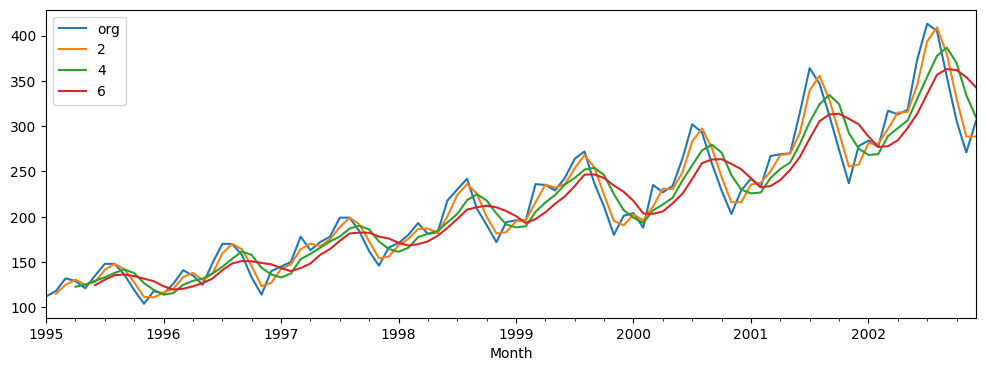

In [20]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,8,2):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [21]:
#Time series decomposition plot

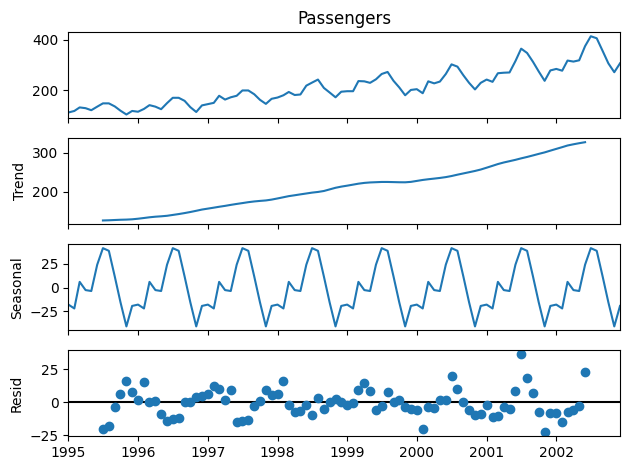

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [23]:
#Evaluation Metric RMSE

In [24]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [25]:
#Simple Exponential Method

In [26]:
import warnings
warnings.filterwarnings("ignore")
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

68.0067403134932

In [27]:
#Holt method

In [28]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

52.92194971240321

In [29]:
#Holts winter exponential smoothing with additive seasonality and additive trend

In [30]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

63.14440376379176

In [31]:
#Model based Forecasting Methods

In [32]:
# Data preprocessing for models
data1 = data.copy()
data1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [33]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]

data1["log_psngr"] = np.log(data1["Passengers"])

data1.head()

,Passengers,t,t_squared,log_psngr
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [34]:
#Splitting data

In [35]:
# Splitting data into Train and Test (77/33)
Train = data1.head(84)
Test = data1.tail(12)

In [36]:
#Linear Model

In [37]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

53.19923653480278

In [38]:
#Exponential Model

In [39]:
Exp = smf.ols('log_psngr~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

46.05736110315654

In [40]:
#Quadratic Model

In [41]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.05188897933164

In [42]:
#ARIMA model

In [43]:
series = data.copy()
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [44]:
# separate out a validation dataset
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


In [45]:
#Persistence/ Base model

In [46]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]
print(train.shape)
print(test.shape)

(60,)
(24,)


In [47]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
RMSE: 29.058


In [48]:
rmse_Persistence_model = 29.058

In [49]:
#ARIMA Hyperparameters

In [50]:
series = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [51]:
# separate out a validation dataset
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


In [52]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.715)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [53]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [54]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [55]:
rmse_ARIMA_model = 24.650

In [69]:
#Build Model based on the optimized values
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [70]:
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float64')

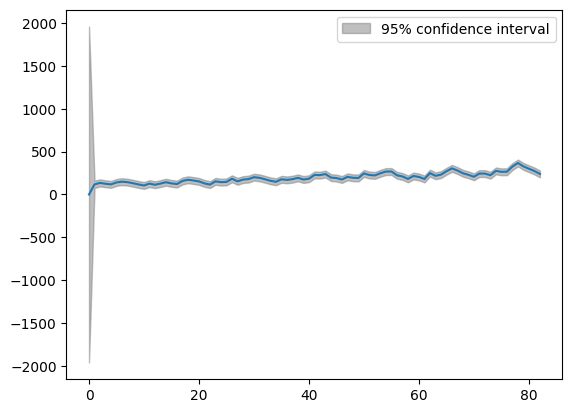

In [72]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=12)[0]
tsa_plots.plot_predict(model_fit, dynamic=False)
plt.show()

In [73]:
print('Forecast:', forecast)

Forecast: 300.0525647023346


In [83]:
# # Assuming placeholder values for RMSE
# rmse_ses_model = 0.1
# rmse_hw_model = 0.2
# rmse_hwe_model_add = 0.3
# rmse_hwe_model_mul = 0.4
# rmse_linear_model = 0.5
# rmse_Exp_model = 0.6
# rmse_Quad_model = 0.7
# rmse_Persistence_model = 0.8
# rmse_ARIMA_model = 0.9
# model_data = [
#     ['Simple Exponential Method', rmse_ses_model],
#     ['Holt method', rmse_hw_model],
#     ['HW exp smoothing add', rmse_hwe_model_add],
#     ['HW exp smoothing mult', rmse_hwe_model_mul],
#     ['Linear Mode', rmse_linear_model],
#     ['Exp model', rmse_Exp_model],
#     ['Quad model', rmse_Quad_model],
#     ['Persistence/ Base model', rmse_Persistence_model],
#     ['ARIMA Model', rmse_ARIMA_model]
# ]

# # Creating a DataFrame
# df = pd.DataFrame(model_data, columns=['Model', 'RMSE_Value'])

# # Displaying the DataFrame
# print(df)

In [89]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          # ['HW exp smoothing add',rmse_hwe_model_mul_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['Persistence/ Base model', rmse_Persistence_model], ['ARIMA Model', rmse_ARIMA_model]]
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value'])
df


,Model,RMSE_Value
0,Simple Exponential Method,0.1
1,Holt method,0.2
2,Linear Mode,0.5
3,Exp model,0.6
4,Quad model,0.7
5,Persistence/ Base model,0.8
6,ARIMA Model,0.9
